In [1]:
import pandas as pd
import numpy as np
import tqdm
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

pd.set_option("max_rows", 200)
pd.set_option("max_columns", 50)
tqdm.tqdm.pandas()
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle").sort_values(["user_id", "timestamp"]).reset_index(drop=True)

In [3]:
import sys
sys.path.append("../")
# df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")
df = df.sort_values(["user_id", "timestamp"])
# large_user_id = df["user_id"].value_counts()
# large_user_id = large_user_id[large_user_id > 1000] 
# df = df[df["user_id"].isin(large_user_id.index)]
# df = df[df["answered_correctly"] != -1]
df["answered_correctly"] = df["answered_correctly"].replace(-1, np.nan)

In [7]:
from feature_engineering.feature_factory import DurationPreviousContent, FeatureFactoryManager
from experiment.common import get_logger

logger = get_logger()

feature_factory_dict = {"user_id": {}}
feature_factory_dict["user_id"]["DurationPreviousContent"] = DurationPreviousContent(is_partial_fit=True)
feature_factory_manager = FeatureFactoryManager(feature_factory_dict=feature_factory_dict,
                                                logger=logger,
                                                split_num=1,
                                                model_id=None,
                                                load_feature=True,
                                                save_feature=True)

In [8]:
df = feature_factory_manager.all_predict(df)

save


In [9]:
df

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,bundle_id,correct_answer,part,tags,tag,type_of,duration_previous_content,duration_previous_content_cap100k
0,0,24600,7900,0,0,0,1.0,NaN,NaN,7900,7900,0,1,131 93 81,-1,NaN,0,0
1,25379,24600,7876,0,1,2,0.0,24000.0,False,7876,7876,3,1,10 94 92,-1,NaN,25379,25379
2,50137,24600,175,0,2,2,1.0,23000.0,False,175,175,2,1,9 10 92,-1,NaN,24758,24758
3,70181,24600,1278,0,3,3,1.0,22000.0,False,1278,1278,3,2,143 140 81 29,-1,NaN,20044,20044
4,148601,24600,2064,0,4,2,0.0,18000.0,False,2064,2063,1,3,157 92 29,-1,NaN,26140,26140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033861,55863864,2147481750,9980,0,45,2,1.0,3000.0,True,9980,9980,2,5,79,-1,NaN,34075,34075
10033862,55884826,2147481750,5528,0,46,2,1.0,28000.0,True,5528,5528,2,5,14,-1,NaN,20962,20962
10033863,55910967,2147481750,5279,0,47,3,1.0,14000.0,True,5279,5279,3,5,177,-1,NaN,26141,26141
10033864,55938555,2147481750,5222,0,48,1,0.0,20000.0,True,5222,5222,2,5,175,-1,NaN,27588,27588


In [19]:
df["content_id"].value_counts().head(100)

6116     21280
6173     20076
4120     19898
175      19418
7876     18885
7900     17977
2063     17423
2064     17423
2065     17423
4492     17304
4696     17151
3363     17044
3365     17044
3364     17044
1278     16979
6370     16897
2946     16619
2948     16619
2947     16619
2594     15992
2593     15992
2595     15991
7218     15900
7217     15900
7216     15900
7219     15899
10686    13618
10688    13364
294      13152
10685    12772
10684    12691
10687    12473
3878     11853
6878     10510
6880     10510
6877     10510
6879     10510
3731      9457
4995      9156
4414      8817
1315      8733
6908      8314
6910      8313
6909      8313
6911      8313
877       7797
3717      7454
4476      7262
853       7194
4108      7167
951       7021
5177      6878
6318      6875
199       6720
7898      6552
6117      6510
4821      6494
738       6434
824       6362
5616      6312
6120      6303
9259      6225
446       6176
4258      6147
6002      6116
834       6112
6119      

answered_correctly
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration_previous_content_cap100k, dtype: object

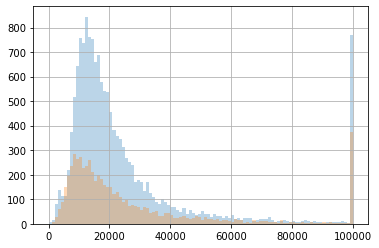

In [16]:
df[df["content_id"] == 6116].groupby("answered_correctly")["duration_previous_content_cap100k"].hist(bins=100, alpha=0.3)

In [17]:
df[df["content_id"] == 6116].groupby("answered_correctly")["duration_previous_content_cap100k"].describe()

,count,mean,std,min,25%,50%,75%,max
answered_correctly,,,,,,,,
0.0,15339.0,25143.815438,22543.931794,0.0,12154.5,17416.0,27185.5,100000.0
1.0,5941.0,26842.416260,25277.266570,0.0,10660.0,17421.0,31345.0,100000.0


answered_correctly
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: duration_previous_content, dtype: object

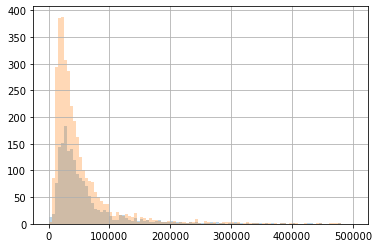

In [26]:
df[df["content_id"] == 5183].groupby("answered_correctly")["duration_previous_content"].hist(bins=100, alpha=0.3, range=(0, 500_000))

answered_correctly
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: prior_question_elapsed_time, dtype: object

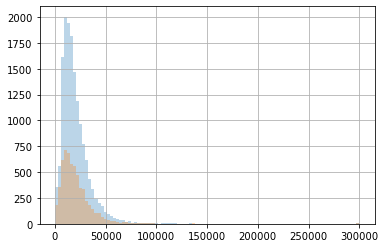

In [27]:
df[df["content_id"] == 6116].groupby("answered_correctly")["prior_question_elapsed_time"].hist(bins=100, alpha=0.3)

answered_correctly
0.0    AxesSubplot(0.125,0.125;0.775x0.755)
1.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: prior_question_elapsed_time, dtype: object

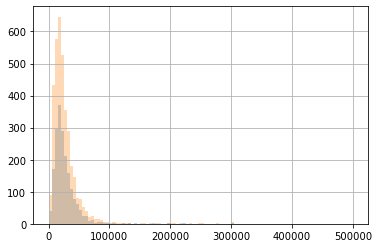

In [28]:
df[df["content_id"] == 5183].groupby("answered_correctly")["prior_question_elapsed_time"].hist(bins=100, alpha=0.3, range=(0, 500_000))

In [29]:
df[df["content_id"] == 5183].groupby("answered_correctly")["prior_question_elapsed_time"].describe()

,count,mean,std,min,25%,50%,75%,max
answered_correctly,,,,,,,,
0.0,1932.0,25310.048137,19631.355542,1000.0,14000.0,21000.0,31000.0,300000.0
1.0,3629.0,25251.655277,22727.733426,0.0,13000.0,20000.0,31000.0,300000.0
